### Online Payments Fraud Detection with Machine Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)

### IMPORTING THE DATA

In [3]:
data = pd.read_csv('artifacts//data_ingestion//Raw_data.csv')

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### EXPLORATORY DATA ANALYSIS

In [13]:
data.shape

(6362620, 11)

In [31]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [32]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [33]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [36]:
data.duplicated().sum()

0

#### DISTRIBUTION OF TARGET FEATURE

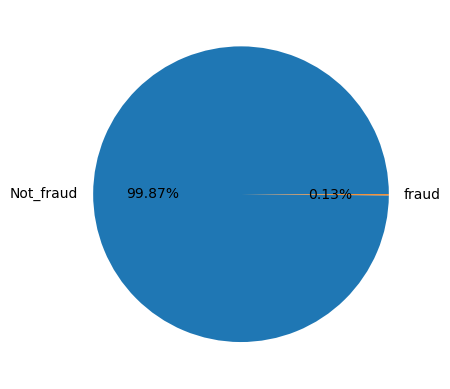

In [39]:
plt.pie(x = data.isFraud.value_counts(), labels = ["Not_fraud", "fraud"], autopct = '%.2f%%')
plt.show()

### DISTRIBUTION OF TYPE OF PAYMENT

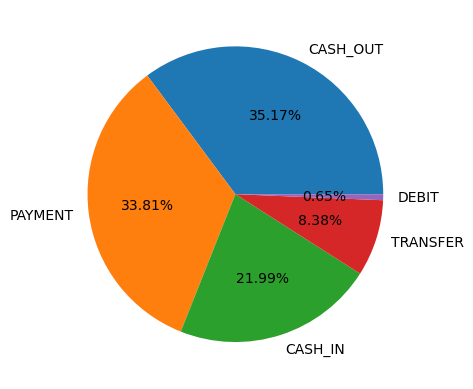

In [42]:
plt.pie(x = data.type.value_counts(), labels = ["CASH_OUT", "PAYMENT", "CASH_IN", "TRANSFER", "DEBIT"], autopct = '%.2f%%')
plt.show()

### CHECKING THE CORRELATION BETWEEN THE FEATURES AND THE TARGET COLUMN

In [44]:
correlation = data.corr(numeric_only = True)

In [62]:
correlation['isFraud'].sort_values(ascending = False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

### TRANSFORMING THE CATEGORICAL FEATURES INTO NUMERICAL VALUES

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [7]:
data.type.head()

0     PAYMENT
1     PAYMENT
2    TRANSFER
3    CASH_OUT
4     PAYMENT
Name: type, dtype: object

In [8]:
le = LabelEncoder()

In [9]:
data['type'] = le.fit_transform(data['type'])

In [10]:
data.type.head()

0    3
1    3
2    4
3    1
4    3
Name: type, dtype: int32

In [11]:
data.type.unique()

array([3, 4, 1, 2, 0])

In [72]:
data['isFraud'] = data['isFraud'].map({0 : "No_Fraud", 1 : "Fraud"})

### SPLITTING THE DATA INTO TRAINING AND TESTING

In [74]:
from sklearn.model_selection import train_test_split

In [76]:
x = data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]]

In [77]:
y = data[["isFraud"]]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5090096, 4), (1272524, 4), (5090096, 1), (1272524, 1))

### BUILDING THE MODEL

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
model = DecisionTreeClassifier()

In [83]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
y_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(y_test, y_pred)

0.9997108109552354

In [21]:
import mysql.connector
import pandas as pd

In [23]:
config = {
    'user': 'root',
    'password': '#@augustin#@7',
    'host': 'localhost',
    'database': 'creditscoreclassification'
}

In [25]:
connection = mysql.connector.connect(**config)

In [27]:
query = "SELECT * FROM credit_score_table"

In [29]:
data_frame = pd.read_sql(query, connection)

In [31]:
data_frame.to_csv('output.csv', index=False)

In [32]:
connection.close()

In [33]:
x = pd.read_csv('output.csv')

In [34]:
x.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interes_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Crdit_History_Age,Payment_of_min_amount,Total_EMI_per_month,Amount_invested_monthly,Payment_behaviour,Monthly_balance,Credit_score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [39]:
x.shape

(100000, 28)